# Assignment 1, Question 1: Fashion

Instructions:
* Please complete the assignments in this notebook. You should submit this notebook, as well as a PDF version, to blackboard.
* To create the PDF, see File > Download as. You can export to PDF via Latex, or export to HTML and then print to PDF.
* Check your code before submission. It should be possible to reproduce all your results via 'run all'.
* Add a clear explanation of your approach and an in-depth interpretation of your results for every subquestion. Use markdown cells for this.
* Keep the PDF for each question below 5 pages. Remove these instructions in the final PDF.
* Avoid all unnecessary outputs. Only output the answers to the questions. Add ';' behind lines that generate output to suppress the output.
* Add the names of all team members below.

TEAM MEMBER 1 = ...  
TEAM MEMBER 2 = ...  
TEAM MEMBER 3 = ...  
TEAM MEMBER 4 = ...  

## Fashion-MNIST 
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. You can download it from OpenML and visualize some of the examples

In [2]:
# General imports
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures

In [3]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

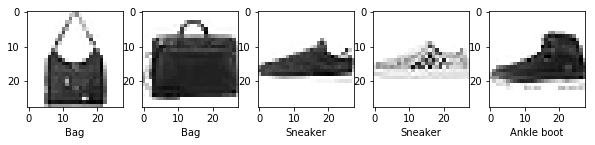

In [9]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[y[n]]))
plt.show();

1_ Evaluate k-Nearest Neighbors, Logistic Regression and Linear SVM. (1 point)
- Take a *stratified* 10% subsample of the data. Use it for everything below
- Evaluate the 3 classifiers with their default settings. Use cross-validation with 3 folds, output the accuracy and standard deviation.
- Discuss which one works best.

Note: you can use a smaller sample while testing/bugfixing

2_ Tune the parameters using GridSearchCV. (2 points)
- Vary the main hyperparameter (C or k) for all 3 models. Do the results improve?  Which ranges have an effect on performance?
- Visualize both the test score and training score as function of the parameters for all three models. Discuss when (for which values) the model is underfitting or overfitting.

Note: you can use a line plot or 1D heatmap for visualization. Use again 3-fold cross-validation and accuracy.

In [1]:
# You can use this generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name):
    plt.figure()
    plt.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    plt.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax = plt.gca()
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    plt.title(grid_search.best_estimator_.__class__.__name__)
    print('Best configuration:' + str(grid_search.best_params_))
    print('Best score (ACC):' + str(grid_search.best_score_))

3_ Analyze which types of misclassifications are made (1 points)
- Create a standard train_test split
- Train Logistic Regression on the training data and generate predictions on the test set
- Visualize (like above) a few examples that are misclassified by Logistic Regression. Discuss: are these indeed difficult cases?
- Build the 'confusion_matrix' of all predictions. Discuss which classes are often confused.

4_ Visualize the model parameters (1 point)
- Retrieve the model parameters (coefficients) for LogisticRegression and Linear Support Vector Machines
- Plot the coefficients as a 28*28 image as above. 
- Interpret the results. Which pixels does the models pay most attention to? Why? Is there a difference between both models?